C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_12804\3506702228.py:39: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  return df.groupby(group_col, group_keys=False).apply(filter_group)
C:\Users\Siyu\AppData\Local\Temp\2\ipykernel_12804\3506702228.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


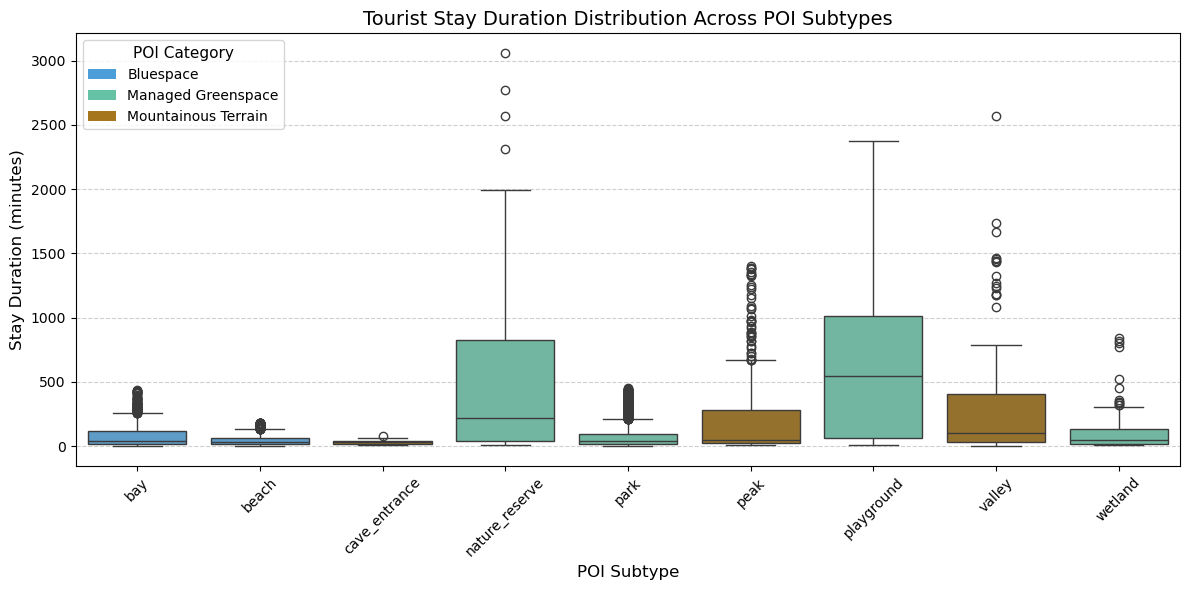

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Patch


path = r"\\tsclient\D\Siyu Zhao\data\Auckland region park\infostop_with_no_homelocation_matched_poi.csv"
df = pd.read_csv(path)



target_poi_types = [
    "beach", "bay", "wetland",
    "park", "playground", "nature_reserve",
    "peak", "valley", "cave_entrance"
]

# process POI subtype
def get_poi_subtype(row):
    for col in ["natural", "leisure"]:
        if pd.notna(row.get(col)) and row[col] in target_poi_types:
            return row[col]
    return None

df["poi_subtype"] = df.apply(get_poi_subtype, axis=1)

# filter out rows with no poi_subtype
df = df[df["poi_subtype"].notna()].copy()

def remove_outliers_iqr(df, group_col, value_col):
    def filter_group(group):
        q1 = group[value_col].quantile(0.25)
        q3 = group[value_col].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        return group[(group[value_col] >= lower) & (group[value_col] <= upper)]
    
    return df.groupby(group_col, group_keys=False).apply(filter_group)

filtered_df = remove_outliers_iqr(df, group_col="poi_subtype", value_col="duration_minutes")

color_mapping = {
    "beach": "#4C9ED9",          
    "bay": "#4C9ED9",            
    "wetland": "#66C2A5",        
    "park": "#66C2A5",           
    "playground": "#66C2A5",     
    "nature_reserve": "#66C2A5", 
    "peak": "#A6761D",           
    "valley": "#A6761D",         
    "cave_entrance": "#A6761D",  
}


plt.figure(figsize=(12, 6))
sns.boxplot(
    data=filtered_df,
    x="poi_subtype",
    y="duration_minutes",
    palette=color_mapping,
    
)


legend_elements = [
    Patch(facecolor="#4C9ED9", label="Bluespace"),
    Patch(facecolor="#66C2A5", label="Managed Greenspace"),
    Patch(facecolor="#A6761D", label="Mountainous Terrain")
]


plt.xlabel("POI Subtype", fontsize=12)
plt.ylabel("Stay Duration (minutes)", fontsize=12)
plt.title("Tourist Stay Duration Distribution Across POI Subtypes", fontsize=14)
plt.xticks(rotation=45)
plt.legend(handles=legend_elements, title="POI Category", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()